In [2]:
def insertion_sort(L):
    if len(L) <= 1:
        return L
    output = [L[0]]
    for i in range(1, len(L)):
        j = 0
        while True:
            if j < len(output) and L[i] > output[j]:
                j += 1
            else:
                output = output[:j] + [L[i]] + output[j:]
                break
    return output

In [3]:
def bubble_sort(L):
    while True:
        swapped = False
        for i in range(0, len(L)-1):
            if L[i] > L[i+1]:
                L[i], L[i+1] = L[i+1], L[i]
                swapped = True
        if swapped == False:
            return L

In [4]:
def merge_sort(L):
    if len(L) <= 1:
        return L
    split = len(L) // 2
    return merge(merge_sort(L[:split]), merge_sort(L[split:]))

def merge(L1, L2):
    output = []
    i1 = 0
    i2 = 0
    while i1 < len(L1) and i2 < len(L2):
        if L1[i1] <= L2[i2]:
            output.append(L1[i1])
            i1 += 1
        else:
            output.append(L2[i2])
            i2 += 1
    return output + L1[i1:] + L2[i2:]

In [5]:
def quicksort(L):
    if len(L) <= 1:
        return L
    pivot = L[0]
    lower = []
    upper = []
    for element in L[1:]:
        if element < pivot:
            lower.append(element)
        else:
            upper.append(element)
    return quicksort(lower) + [pivot] + quicksort(upper)

In [6]:
# run this to time each sorting function on the list

import time
import copy
import random

def random_list(n):
    return [random.randint(0,10000) for _ in range(n)]

def measure_time(f, arg):
    arg = copy.copy(arg)
    start = time.time()
    arg = f(arg)
    end = time.time()
    assert arg == sorted(arg)
    return end - start

# add new sorting functions here to test them
functions = {insertion_sort: 'insertion_sort', bubble_sort: 'bubble_sort', merge_sort: 'merge_sort', quicksort: 'quicksort', sorted: 'python'}

# change the lengths of the random lists here
# i don't recommend testing bubble sort or other slow sorts on lists over 10000 elements long!
arguments = {i: random_list(i) for i in [1, 10, 100, 1000, 5000, 10000]}
times = {}
for f in functions:
    times[f] = {}
    for i in arguments.keys():
        times[f][i] = measure_time(f, arguments[i])

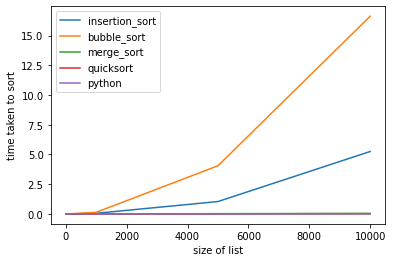

In [8]:
# run this to plot the results from the previous block

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for f, name in functions.items():
    ax.plot(list(arguments.keys()), [times[f][i] for i in arguments.keys()], label=name)
ax.set_xlabel('size of list')
ax.set_ylabel('time taken to sort')
ax.legend()
plt.show()